In [11]:
#Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define paths to training and validation data
train_data_dir = "/home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/realism/train/"
valid_data_dir = "/home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/realism/valid/"

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
NUM_EPOCHS = 25

# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 10248 images belonging to 2 classes.


In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary')

# Load the VGG19 model pre-trained on ImageNet without the top layer
base_model = VGG19(weights='imagenet', include_top=False)


# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
# TODO: Start with lower amount of dense layer nodes and go descending
x = Dense(1024, activation='relu')(x)

# Add a logistic layer -- the output layer
predictions = Dense(1, activation='sigmoid')(x)

# Model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Train the model
# TODO --> https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4
# TODO: Add Early stopping --> 
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // BATCH_SIZE
)

Found 2000 images belonging to 2 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Epoch 1/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 63s 187ms/step - accuracy: 0.8304 - loss: 0.3590 - val_accuracy: 0.9309 - val_loss: 0.1663
Epoch 2/25
  1/320 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8438 - loss: 0.2705

2024-05-09 06:08:10.636778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:08:10.636801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8438 - loss: 0.2705 - val_accuracy: 0.8125 - val_loss: 0.3774
Epoch 3/25


2024-05-09 06:08:10.852539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:08:10.852572: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 06:08:10.852585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 186ms/step - accuracy: 0.9165 - loss: 0.2044 - val_accuracy: 0.9350 - val_loss: 0.1767
Epoch 4/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 0.8750 - loss: 0.2293 - val_accuracy: 0.9375 - val_loss: 0.0945
Epoch 5/25


2024-05-09 06:09:11.902557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:09:11.902581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:09:11.902598: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 06:09:11.902608: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 06:09:11.929681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:09:11.929698: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 186ms/step - accuracy: 0.9404 - loss: 0.1602 - val_accuracy: 0.9466 - val_loss: 0.1502
Epoch 6/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 0.9688 - loss: 0.0744 - val_accuracy: 1.0000 - val_loss: 0.0182
Epoch 7/25


2024-05-09 06:10:12.884534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:10:12.884555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:10:12.911739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:10:12.911759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:10:12.911775: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905


320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 188ms/step - accuracy: 0.9401 - loss: 0.1487 - val_accuracy: 0.9521 - val_loss: 0.1373
Epoch 8/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - accuracy: 0.9688 - loss: 0.1631 - val_accuracy: 1.0000 - val_loss: 0.0528
Epoch 9/25


2024-05-09 06:11:14.217804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:11:14.217848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:11:14.244883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:11:14.244900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:11:14.244917: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905


320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 187ms/step - accuracy: 0.9476 - loss: 0.1436 - val_accuracy: 0.9546 - val_loss: 0.1155
Epoch 10/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 121us/step - accuracy: 0.9688 - loss: 0.0927 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 11/25


2024-05-09 06:12:15.614529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:12:15.614563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:12:15.642319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:12:15.642335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:12:15.642351: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905


320/320 ━━━━━━━━━━━━━━━━━━━━ 62s 188ms/step - accuracy: 0.9453 - loss: 0.1379 - val_accuracy: 0.9546 - val_loss: 0.1125
Epoch 12/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 104us/step - accuracy: 1.0000 - loss: 0.0300 - val_accuracy: 0.8750 - val_loss: 0.2237
Epoch 13/25


2024-05-09 06:13:17.224789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:13:17.224818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:13:17.252090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:13:17.252103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:13:17.252118: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905


320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 187ms/step - accuracy: 0.9497 - loss: 0.1292 - val_accuracy: 0.9451 - val_loss: 0.1487
Epoch 14/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - accuracy: 0.9688 - loss: 0.0700 - val_accuracy: 0.8750 - val_loss: 0.3787
Epoch 15/25


2024-05-09 06:14:18.542311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:14:18.542335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:14:18.542349: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 06:14:18.542363: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 06:14:18.569856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:14:18.569874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 188ms/step - accuracy: 0.9513 - loss: 0.1247 - val_accuracy: 0.9441 - val_loss: 0.1401
Epoch 16/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.9688 - loss: 0.0787 - val_accuracy: 1.0000 - val_loss: 0.0636
Epoch 17/25


2024-05-09 06:15:19.979243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:15:19.979266: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 06:15:19.979276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-09 06:15:20.006670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:15:20.006683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


320/320 ━━━━━━━━━━━━━━━━━━━━ 62s 189ms/step - accuracy: 0.9498 - loss: 0.1329 - val_accuracy: 0.9567 - val_loss: 0.1177
Epoch 18/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 109us/step - accuracy: 0.9375 - loss: 0.1573 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 19/25


2024-05-09 06:16:21.720439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:16:21.720459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:16:21.748133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:16:21.748152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:16:21.748163: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 06:16:21.748173: I tensorflow/core/framework/local_re

320/320 ━━━━━━━━━━━━━━━━━━━━ 62s 188ms/step - accuracy: 0.9540 - loss: 0.1157 - val_accuracy: 0.9466 - val_loss: 0.1269
Epoch 20/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 104us/step - accuracy: 0.9375 - loss: 0.1243 - val_accuracy: 1.0000 - val_loss: 0.0148
Epoch 21/25


2024-05-09 06:17:23.447488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:17:23.447514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-09 06:17:23.447534: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 06:17:23.474935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:17:23.474953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:17:23.474962: I tensorflow/core/framework/local_re

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 187ms/step - accuracy: 0.9505 - loss: 0.1245 - val_accuracy: 0.9617 - val_loss: 0.0930
Epoch 22/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.9688 - loss: 0.0703 - val_accuracy: 0.8750 - val_loss: 0.3384
Epoch 23/25


2024-05-09 06:18:24.793183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:18:24.793207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:18:24.793217: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12126356906347395461
2024-05-09 06:18:24.793227: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1634832345499849905
2024-05-09 06:18:24.820473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:18:24.820490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 188ms/step - accuracy: 0.9547 - loss: 0.1192 - val_accuracy: 0.9456 - val_loss: 0.1389
Epoch 24/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.9375 - loss: 0.1708 - val_accuracy: 1.0000 - val_loss: 0.0268
Epoch 25/25


2024-05-09 06:19:26.365559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:19:26.365583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-09 06:19:26.392808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-09 06:19:26.392829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


320/320 ━━━━━━━━━━━━━━━━━━━━ 62s 189ms/step - accuracy: 0.9571 - loss: 0.1096 - val_accuracy: 0.9602 - val_loss: 0.1081


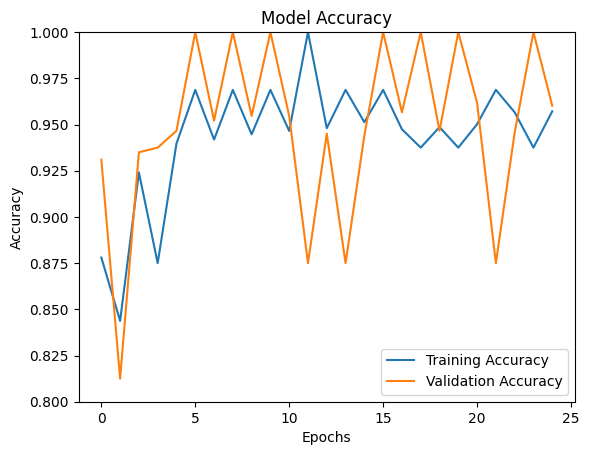

In [14]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust the upper limit of the y-axis
plt.title('Model Accuracy')
plt.legend()
plt.show()

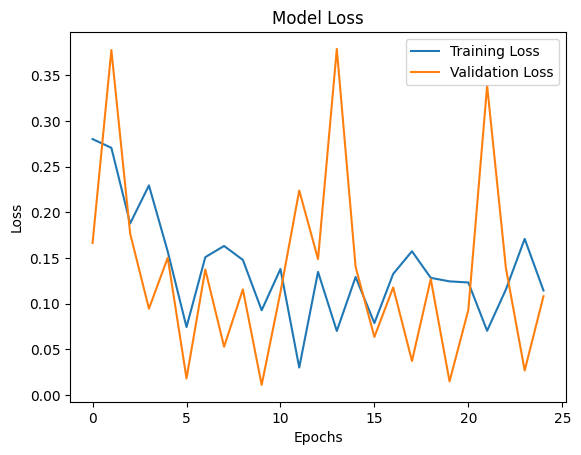

In [15]:
# Plot the Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

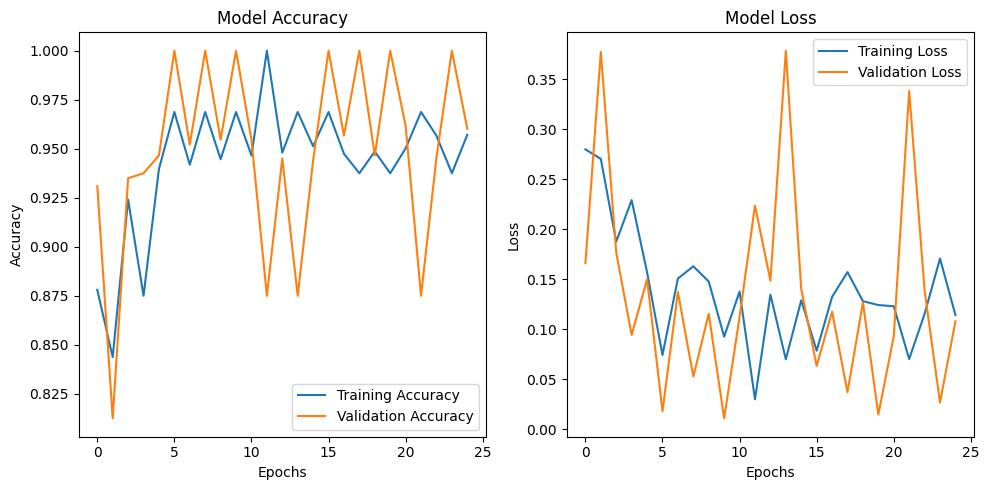

In [16]:
# Accuracy vs Loss

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save weights to save compute time
model.save_weights('weights_VGG16.h5')
